In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn.tree import DecisionTreeClassifier

In [2]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [3]:
#누락 데이터 체크
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [4]:
loans = loans.dropna()

In [5]:
loans.isna().sum().sum()

0

In [6]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [7]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [8]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

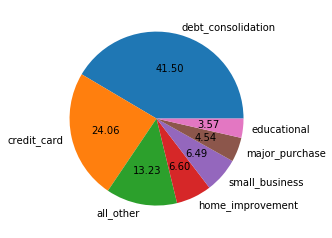

In [9]:
plt.figure(figsize=(4,4))
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(), autopct='%.2f')

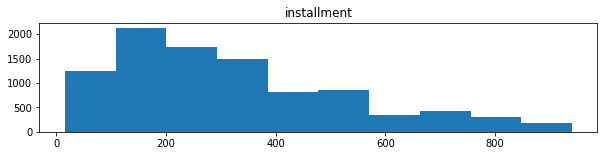

In [10]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['installment'])
p = plt.title('installment')

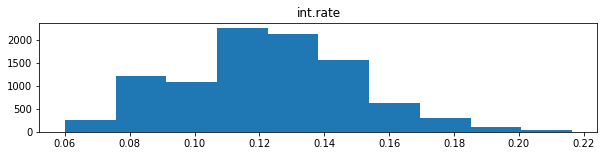

In [11]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['int.rate'])
p = plt.title('int.rate')

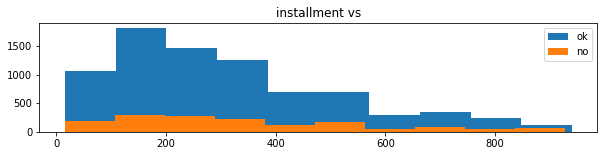

In [12]:
plt.figure(figsize=(10,2))
# 데이터[조건]
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
p = plt.title('installment vs')
p = plt.legend()

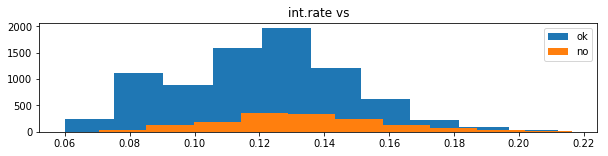

In [13]:
plt.figure(figsize=(10,2))
# 데이터[조건]
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate vs')
p = plt.legend()

In [14]:
loans = pd.get_dummies(loans) #카테고리를 원핫 인코딩

In [15]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [16]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

In [17]:
model.score(X,y)

0.8456284153005464

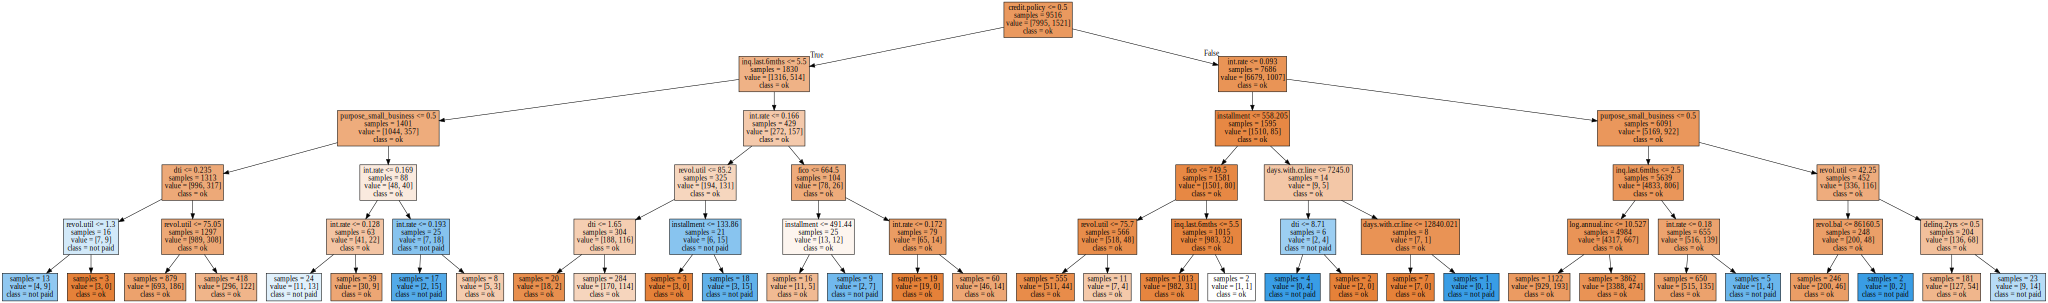

In [18]:
export_graphviz(model, out_file ='loan.dot', class_names=['ok','not paid'], feature_names=X.columns, impurity=False, filled=True)
with open('loan.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    